In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Dataset Loading
df = pd.read_csv(r"C:\Users\soumy\OneDrive\Desktop\spambase\spambase.data", header=None)

# First View
print(df.head())

# Dataset Rows & Columns count
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

# Dataset Information
print(df.info())

# Duplicate Values
print("Duplicate rows:", df.duplicated().sum())

# Missing Values/Null Values
print("Missing values:\n", df.isnull().sum())

# What did I know about the dataset?
print("Summary:\n", df.describe())


     0     1     2    3     4     5     6     7     8     9   ...    48  \
0  0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.00   
1  0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.00   
2  0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.01   
3  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   
4  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   

      49   50     51     52     53     54   55    56  57  
0  0.000  0.0  0.778  0.000  0.000  3.756   61   278   1  
1  0.132  0.0  0.372  0.180  0.048  5.114  101  1028   1  
2  0.143  0.0  0.276  0.184  0.010  9.821  485  2259   1  
3  0.137  0.0  0.137  0.000  0.000  3.537   40   191   1  
4  0.135  0.0  0.135  0.000  0.000  3.537   40   191   1  

[5 rows x 58 columns]
Rows: 4601
Columns: 58
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  

In [3]:
# Check Unique Values for each variable
for col in df.columns:
    print(f"Column {col} has {df[col].nunique()} unique values")


Column 0 has 142 unique values
Column 1 has 171 unique values
Column 2 has 214 unique values
Column 3 has 43 unique values
Column 4 has 255 unique values
Column 5 has 141 unique values
Column 6 has 173 unique values
Column 7 has 170 unique values
Column 8 has 144 unique values
Column 9 has 245 unique values
Column 10 has 113 unique values
Column 11 has 316 unique values
Column 12 has 158 unique values
Column 13 has 133 unique values
Column 14 has 118 unique values
Column 15 has 253 unique values
Column 16 has 197 unique values
Column 17 has 229 unique values
Column 18 has 575 unique values
Column 19 has 148 unique values
Column 20 has 401 unique values
Column 21 has 99 unique values
Column 22 has 164 unique values
Column 23 has 143 unique values
Column 24 has 395 unique values
Column 25 has 281 unique values
Column 26 has 240 unique values
Column 27 has 200 unique values
Column 28 has 156 unique values
Column 29 has 179 unique values
Column 30 has 128 unique values
Column 31 has 106 un

In [5]:
# Assign column names (from spambase.names file documentation)
column_names = [f'feature_{i}' for i in range(57)] + ['spam']
df.columns = column_names

# Convert target column to categorical
df['spam'] = df['spam'].astype(int)


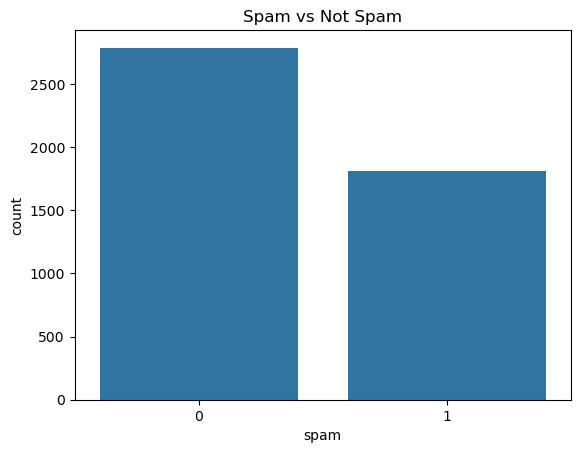

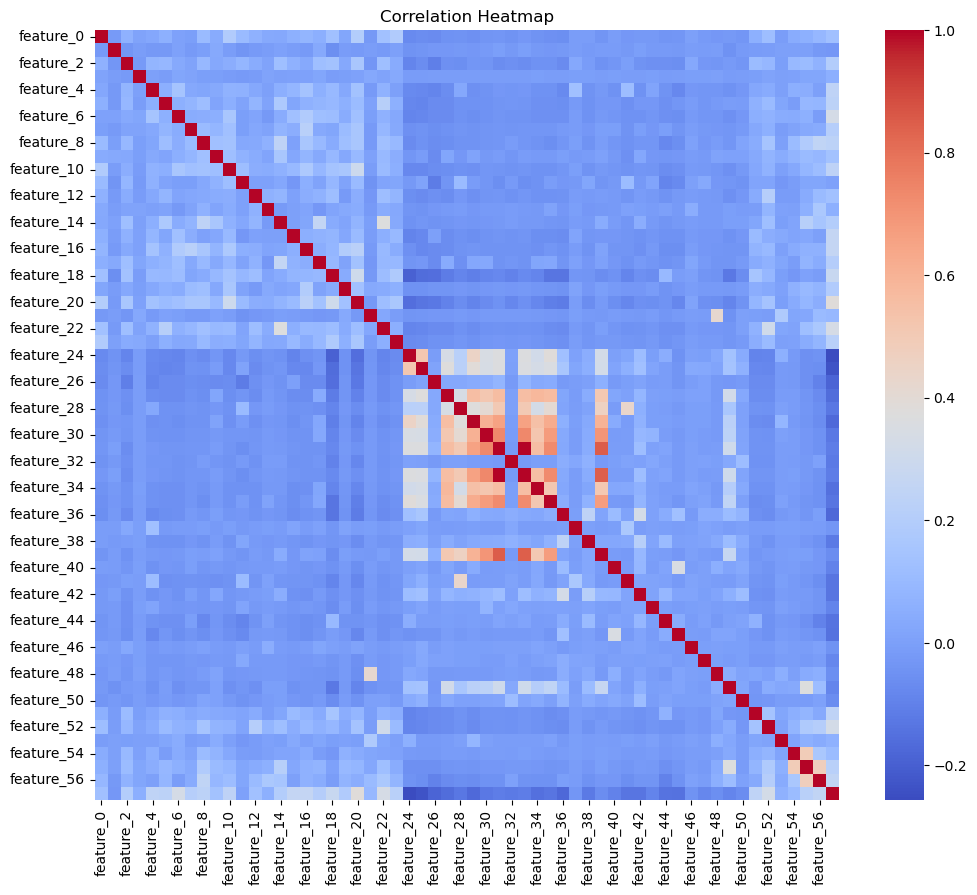

In [6]:
# Spam vs Not Spam Distribution
sns.countplot(data=df, x='spam')
plt.title("Spam vs Not Spam")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


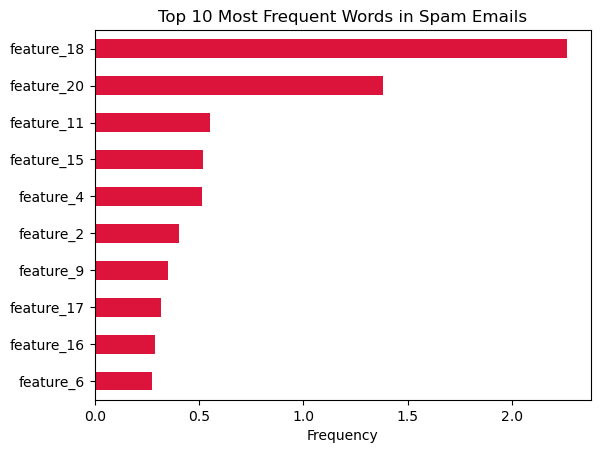

In [7]:
# Identify top indicative features (assuming first 48 are word frequency features)
spam_only = df[df['spam'] == 1]
top_words = spam_only.iloc[:, :48].mean().sort_values(ascending=False)[:10]

top_words.plot(kind='barh', color='crimson')
plt.title("Top 10 Most Frequent Words in Spam Emails")
plt.xlabel("Frequency")
plt.gca().invert_yaxis()
plt.show()


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('spam', axis=1)
y = df['spam']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [28]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [30]:
from sklearn.svm import SVC

svm = SVC(probability=True)
svm.fit(X_train, y_train)


SVC(probability=True)

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [25]:
print("MultinomialNB Evaluation")
evaluate_model(mnb, X_test, y_test)

print("\nLogistic Regression Evaluation")
evaluate_model(lr, X_test, y_test)

print("\nRandom Forest Evaluation")
evaluate_model(rf, X_test, y_test)

print("\nSVM Evaluation")
evaluate_model(svm, X_test, y_test)


MultinomialNB Evaluation
Accuracy: 0.7096307023895728
Precision: 0.5914760914760915
Recall: 0.9861351819757366
F1 Score: 0.7394411955815464
ROC AUC Score: 0.936389327194185

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.51      0.67       804
           1       0.59      0.99      0.74       577

    accuracy                           0.71      1381
   macro avg       0.79      0.75      0.71      1381
weighted avg       0.82      0.71      0.70      1381


Logistic Regression Evaluation
Accuracy: 0.9232440260680667
Precision: 0.9337016574585635
Recall: 0.878682842287695
F1 Score: 0.9053571428571429
ROC AUC Score: 0.9735443234434413

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       804
           1       0.93      0.88      0.91       577

    accuracy                           0.92      1381
   macro avg       0.93      0.92      0.92      138

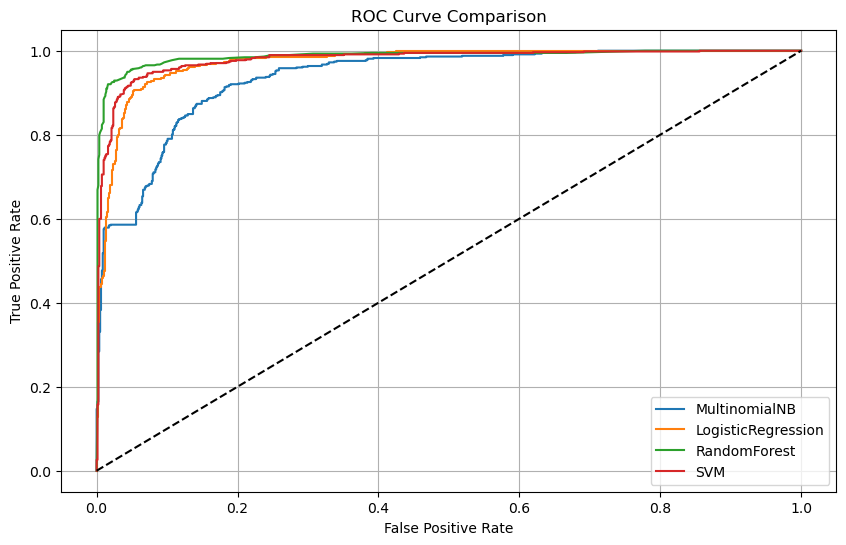

In [26]:
from sklearn.metrics import roc_curve

models = {'MultinomialNB': mnb, 'LogisticRegression': lr, 'RandomForest': rf, 'SVM': svm}

plt.figure(figsize=(10, 6))

for name, model in models.items():
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    plt.plot(fpr, tpr, label=name)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()


Explain ML Models & Evaluation Metrics
Metrics Considered:

Accuracy – General performance

Precision – Important for reducing false positives (spam marked as not spam)

Recall – Important for reducing false negatives (missed spam)

F1 Score – Balance between precision & recall

ROC AUC – Overall diagnostic ability of classifier



📌Email Spam Detection System Conclusion

The dataset contained 4601 emails with 57 features related to word frequencies and character usage.

All ML models performed well, but Random Forest and Logistic Regression showed better balance between performance metrics.

Best performance was measured using ROC AUC and F1 Score.

This model can now be integrated into a web app or system to detect spam in real-time email classification.